#### Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
telecom_df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
telecom_df.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


#### Monthly Frequency 

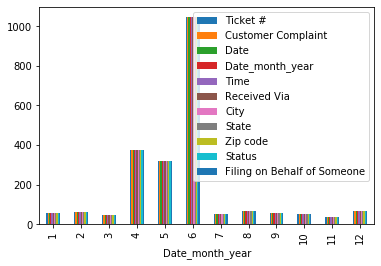

In [4]:
telecom_df["Date_month_year"] = pd.to_datetime(telecom_df["Date_month_year"])
telecom_df.groupby(telecom_df.Date_month_year.dt.month).count().plot(kind='bar')

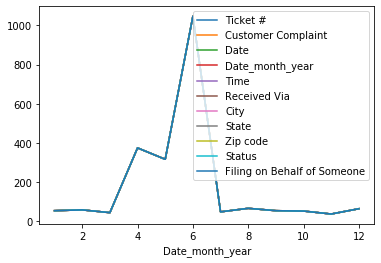

In [5]:
telecom_df.groupby(telecom_df.Date_month_year.dt.month).count().plot()

#### Daily Frequency

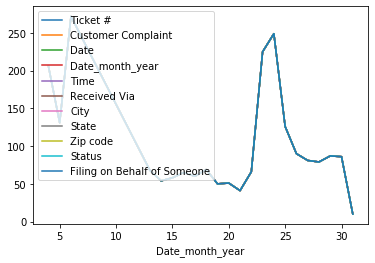

In [6]:
telecom_df.groupby(telecom_df.Date_month_year.dt.day).count().plot()

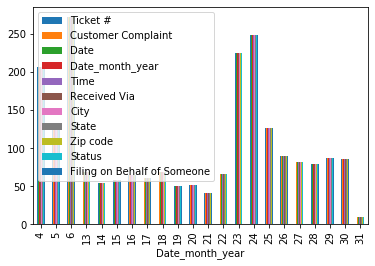

In [7]:
telecom_df.groupby(telecom_df.Date_month_year.dt.day).count().plot(kind="bar")

#### Frequency of complaints

In [8]:
telecom_df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [9]:
df_type = telecom_df['Customer Complaint'].str.upper().value_counts()

In [10]:
df_type.head(50)

COMCAST                               102
COMCAST DATA CAP                       30
COMCAST INTERNET                       29
COMCAST DATA CAPS                      21
COMCAST BILLING                        18
INTERNET SPEED                         15
COMCAST SERVICE                        15
UNFAIR BILLING PRACTICES               13
DATA CAPS                              13
DATA CAP                               12
COMCAST COMPLAINT                      11
COMCAST/XFINITY                        11
COMCAST INTERNET SERVICE               10
BILLING                                 9
BILLING ISSUES                          8
COMCAST CABLE                           5
SERVICE ISSUES                          5
INTERNET                                5
COMCAST BILLING COMPLAINT               5
INTERNET SERVICE                        5
SLOW INTERNET                           5
COMCAST ISSUES                          5
COMCAST BILLING PRACTICES               5
COMPLAINT AGAINST COMCAST         

#### Create a new categorical variable with value as Open and Closed.

In [11]:
telecom_df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in telecom_df["Status"]]

In [12]:
df_status = telecom_df.groupby('State').newStatus.value_counts().unstack()
#df_status = telecom_df.groupby(['State','newStatus'])['COUNT'].sum().unstack()

In [13]:
df_status.head(50)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<Figure size 14400x7200 with 0 Axes>

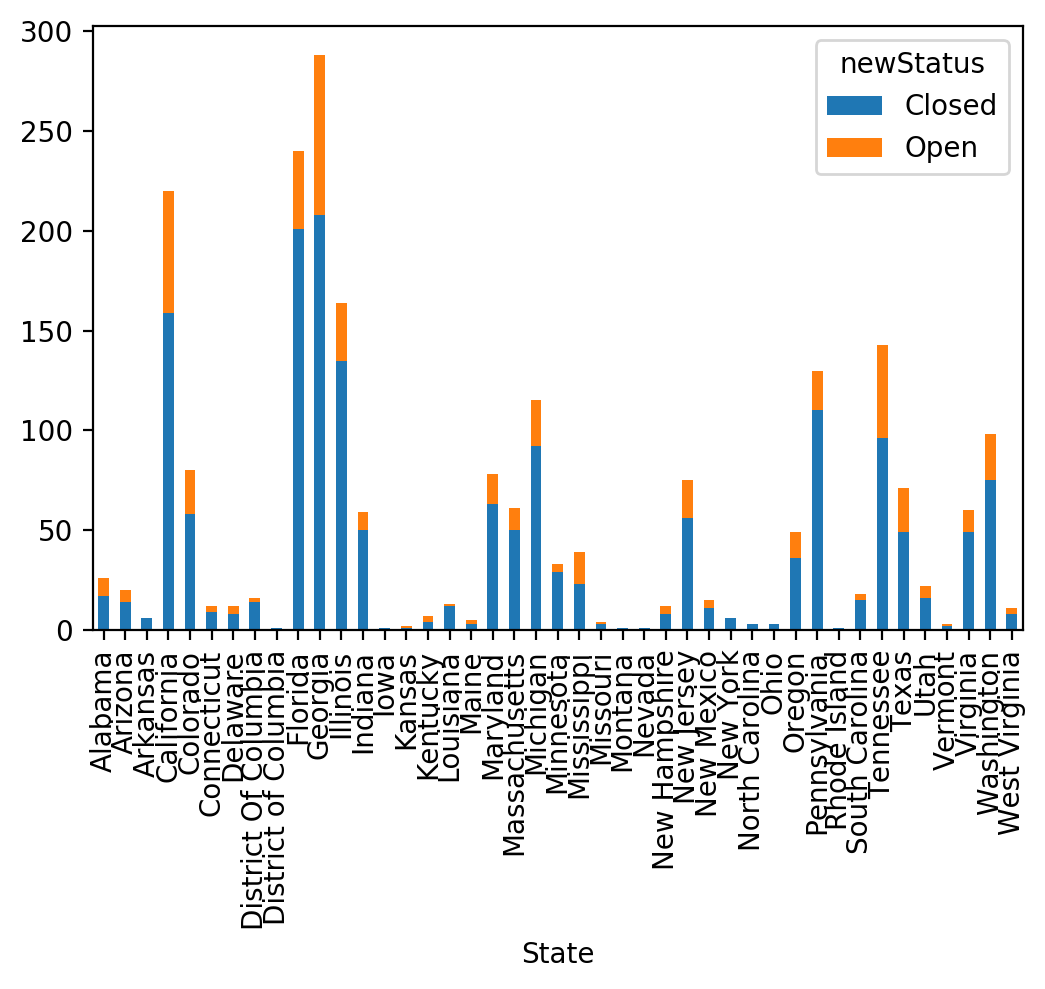

In [14]:
plt.figure(figsize=(200,100)) 
plt.rcParams['figure.dpi'] = 200
df_status.plot(kind='bar', stacked=True)

#### Georgia is having highest complaints

###### Open Complaints

In [15]:
df_open = telecom_df[telecom_df['newStatus']=='Open']

In [16]:
df_open.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,Open
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,Open
12,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,2015-06-13,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,Open
15,370137,Internet complaint,27-06-15,2015-06-27,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,Open


In [17]:
df_open['State'].value_counts()

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Alabama                  9
Indiana                  9
Utah                     6
Arizona                  6
New Mexico               4
New Hampshire            4
Delaware                 4
Minnesota                4
Connecticut              3
South Carolina           3
Kentucky                 3
West Virginia            3
Maine                    2
District Of Columbia     2
Kansas                   1
Vermont                  1
Louisiana                1
Missouri                 1
Name: State, dtype: int64

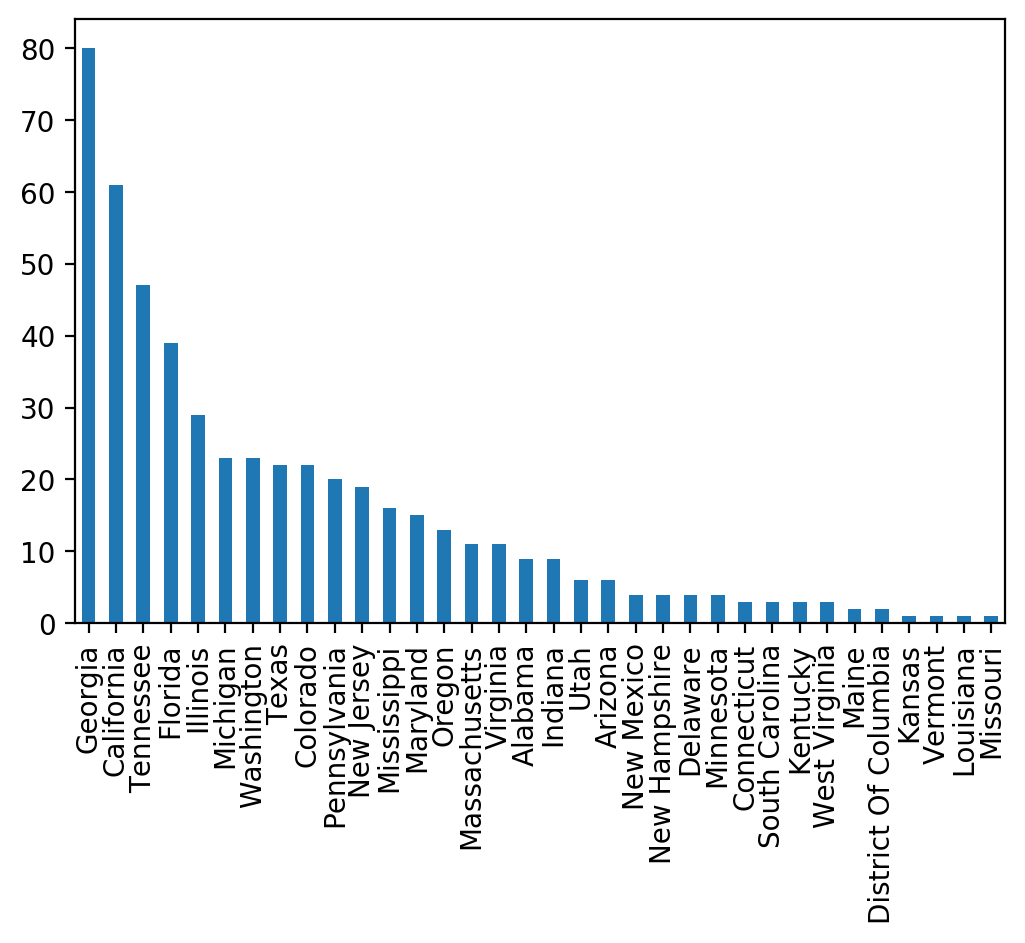

In [18]:
df_open['State'].value_counts().plot(kind="bar")

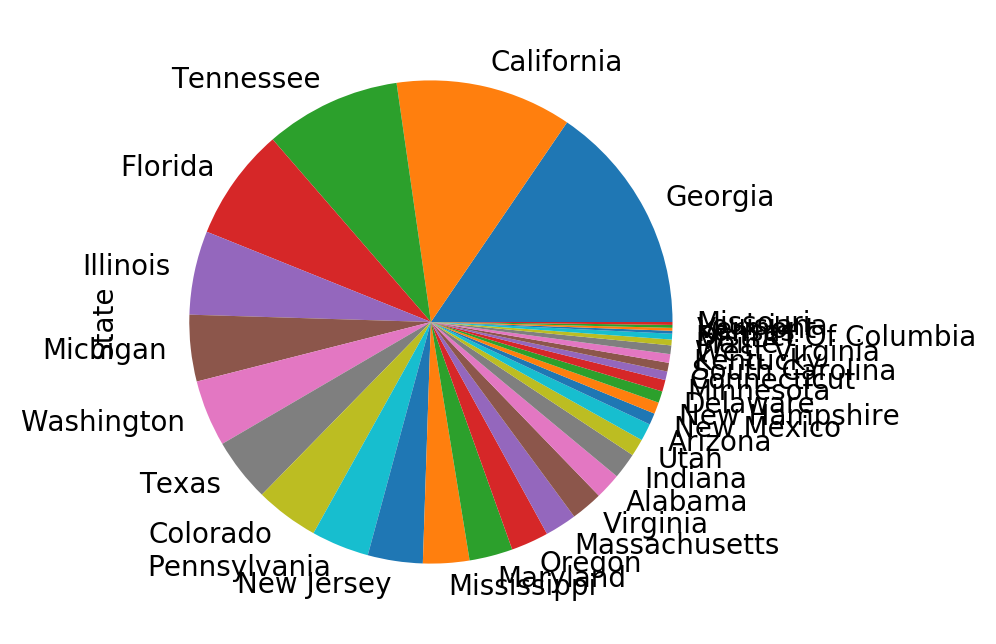

In [19]:
df_open['State'].value_counts().plot(kind="pie")


##### Georgia is having highest open complaints

##### percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
df_received = telecom_df[telecom_df['Received Via'].isin(['Internet','Customer Care Call'])]

In [21]:
df_received.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [22]:
df_received.newStatus.value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

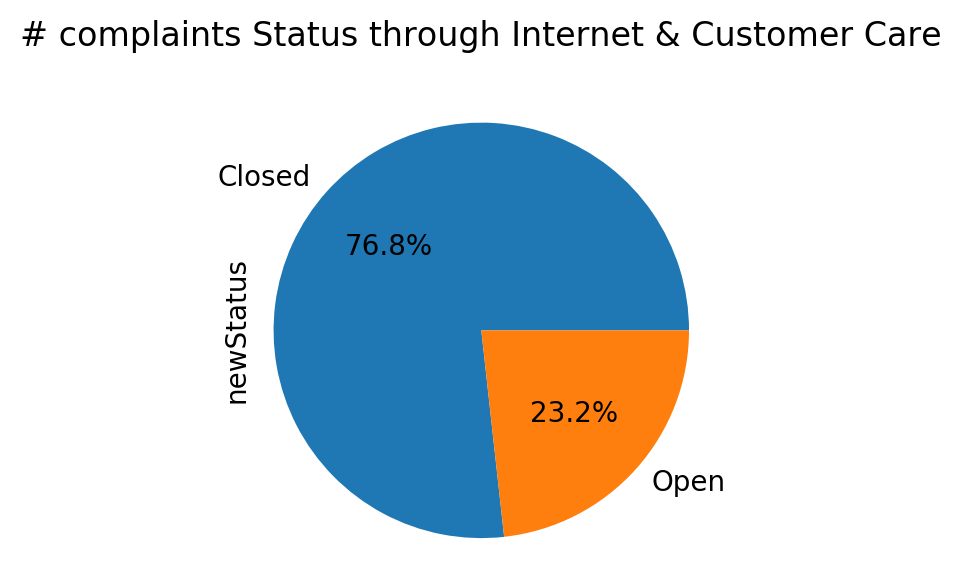

In [23]:
df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        #explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (4,3))
plt.axis('equal')
plt.title('# complaints Status through Internet & Customer Care\n')
plt.tight_layout()
plt.show()